## **Sommaire**

1. [Importation des bibliothèques](#importation)
2. [Chargement des données](#chargement)
3. [EDA pour le dataset `in_time`](#eda_in_time)
    1. [Lecture du dataset](#3_lecture)
    2. [Analyse des données](#3_analyse)
    3. [Détection des valeurs manquantes](#3_manquantes)
    4. [Détection des valeurs dupliquées](#3_dupliquees)
    5. [Nettoyage des données](#3_nettoyage)
    6. [Analyse univariée](#3_univariee)
    7. [Analyse bivariée](#3_bivariee)



---

### 1. <a id='importation'>Importation des bibliothèques</a>

In [2]:
# Ignorer les avertissements
import warnings

import matplotlib.pyplot as plt
import missingno as msno
# Importation des bibliothèques
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

DELIMITER = "--------------------------------"

---

### 2. <a id='chargement'>Chargement des données</a>

In [16]:
# Chargement des données
path = "../data/"
in_time_data = pd.read_csv(path + "in_time.csv")

---

### 3. <a id='eda_general_data'>EDA pour le dataset `in_time`</a>

#### 3.1. <a id='3_lecture'>Lecture du dataset</a>

In [4]:
# Affichage des 5 premières lignes du dataset
print(in_time_data.head())

print(DELIMITER)

# Affichage des 5 dernières lignes du dataset
print(in_time_data.tail())


   Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 09:43:45  2015-01-05 10:08:48   
1           2         NaN  2015-01-02 10:15:44  2015-01-05 10:21:05   
2           3         NaN  2015-01-02 10:17:41  2015-01-05 09:50:50   
3           4         NaN  2015-01-02 10:05:06  2015-01-05 09:56:32   
4           5         NaN  2015-01-02 10:28:17  2015-01-05 09:49:58   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 09:54:26  2015-01-07 09:34:31  2015-01-08 09:51:09   
1                  NaN  2015-01-07 09:45:17  2015-01-08 10:09:04   
2  2015-01-06 10:14:13  2015-01-07 09:47:27  2015-01-08 10:03:40   
3  2015-01-06 10:11:07  2015-01-07 09:37:30  2015-01-08 10:02:08   
4  2015-01-06 09:45:28  2015-01-07 09:49:37  2015-01-08 10:19:44   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 10:09:25  2015-01-12 09:42:53  2015-01-13 10:13:06  ...   
1  2015-01-09 09:4

#### 3.2. <a id='3_analyse'>Analyse des données</a>

In [5]:
# Informations de base
print("Informations de base :")
in_time_data.info()
print(DELIMITER)

# Sommaire des statistiques
print("Sommaire des statistiques :")
print(in_time_data.describe())

Informations de base :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB
--------------------------------
Sommaire des statistiques :
        Unnamed: 0  2015-01-01  2015-01-14  2015-01-26  2015-03-05  \
count  4410.000000         0.0         0.0         0.0         0.0   
mean   2205.500000         NaN         NaN         NaN         NaN   
std    1273.201673         NaN         NaN         NaN         NaN   
min       1.000000         NaN         NaN         NaN         NaN   
25%    1103.250000         NaN         NaN         NaN         NaN   
50%    2205.500000         NaN         NaN         NaN         NaN   
75%    3307.750000         NaN         NaN         NaN         NaN   
max    4410.000000         NaN         NaN         NaN         NaN   

       2015-05-01  2015-07-17  2015-09-17  2015-10-02  2015-11-09  2015-11-10  \
count         0.0 

#### 3.3. <a id='3_manquantes'>Détection des valeurs manquantes</a>


In [6]:
# Nombre de valeurs nulles par colonnes
print(in_time_data.isnull().sum())

Unnamed: 0       0
2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
              ... 
2015-12-25    4410
2015-12-28     234
2015-12-29     230
2015-12-30     265
2015-12-31     213
Length: 262, dtype: int64


#### 3.4. <a id='3_dupliquees'>Détection des valeurs dupliquées</a>


In [8]:
print(f"Nombre de valeurs dupliquées : {in_time_data.duplicated().sum()}")

Nombre de valeurs dupliquées : 0


**Résumé du dataset in_time**

**Structure générale**
- Nombre de lignes : 4410
- Nombre de colonnes : 262

**Colonnes**
1. *Unnamed: 0 (int64)*
- Identifiant unique pour chaque employé
- Pas de valeurs manquantes

2. *2015-01-01 et 2015-12-25*
- Toutes les valeurs sont manquantes (4410/4410)


3. *2015-01-02 à 2015-12-31 (object)*
- Ces colonnes représentent des timestamps (heures de début)
- Nombre de valeurs manquantes : varie entre 206 et 4410 selon les dates

**Points notables**
- Les colonnes avec 100% de valeurs manquantes (ex. 2015-01-01, 2015-12-25) pourraient être supprimées
- Les colonnes contiennent des horodatages (timestamps)
- Bien que les doublons soient absents, la proportion élevée de valeurs nulles est une problématique majeure

#### 3.5. <a id='3_nettoyage'>Nettoyage des données</a>

Pour gérer le cas des données manquantes dans le dataset in_time, nous allons les remplacer par la valeur de la médiane de chaque colonne. Puisque les dates sont au format object, il va falloir les convertir dans un format compréhensible par python afin d'obtenir la médiane


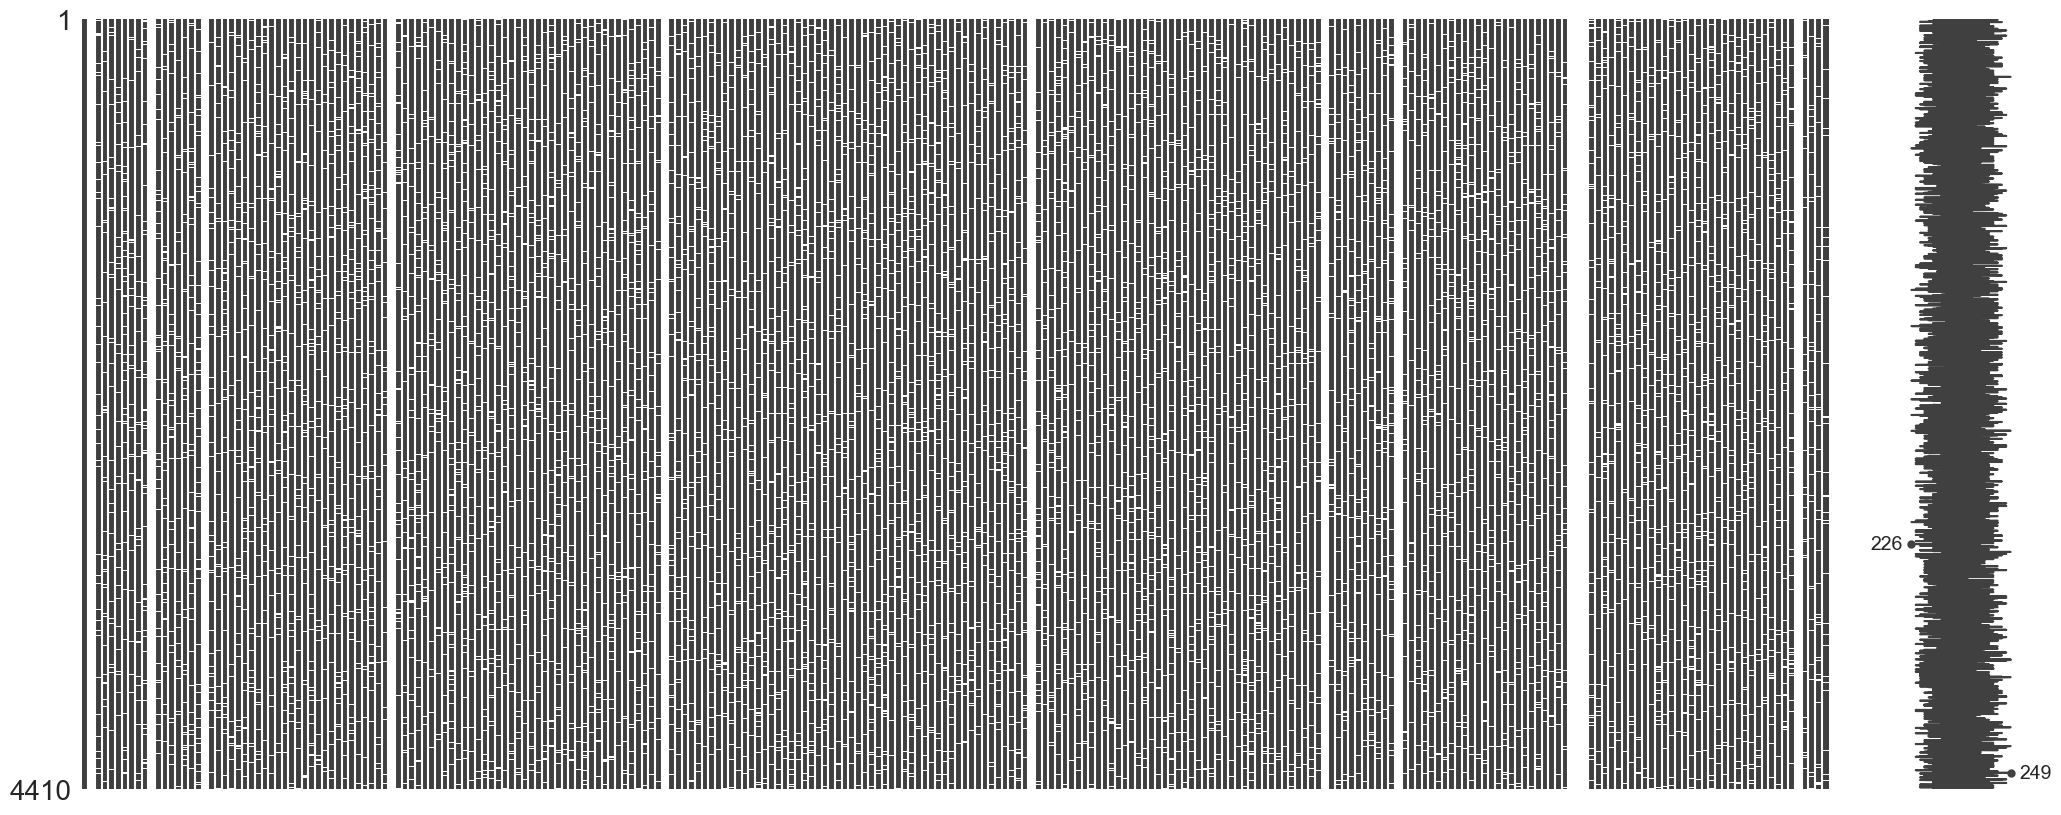

Unnamed: 0       0
2015-01-01    4410
2015-01-02       0
2015-01-05       0
2015-01-06       0
              ... 
2015-12-25    4410
2015-12-28       0
2015-12-29       0
2015-12-30       0
2015-12-31       0
Length: 262, dtype: int64


In [17]:
# Visualisation des données manquantes
msno.matrix(in_time_data)
plt.show()

# Identifier les colonnes non numériques (type 'object')
non_numeric_columns = in_time_data.select_dtypes(include=['object']).columns

for col in non_numeric_columns:
    # Convertir les dates en format datetime
    in_time_data[col] = pd.to_datetime(in_time_data[col])
    # Calculer la médiane des dates en tant que timestamp
    median_date = in_time_data[col].dropna().median()
    # Remplacer les valeurs manquantes par la médiane
    in_time_data[col].fillna(median_date, inplace=True)


# Affichage du nombre de données manquantes
print(in_time_data.isnull().sum())
plt.show()


#### 3.6. <a id='3_univariee'>Analyse univariée</a>

In [9]:
# Comme la colonne EmployeeID est juste une liste d'ID, elle n'est pas pertinente pour l'analyse
numerical_columns = numerical_columns.drop('EmployeeID')
print(f"Colonnes numériques : {numerical_columns.tolist()}")

Colonnes numériques : ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']


3.6.1. Histogramme

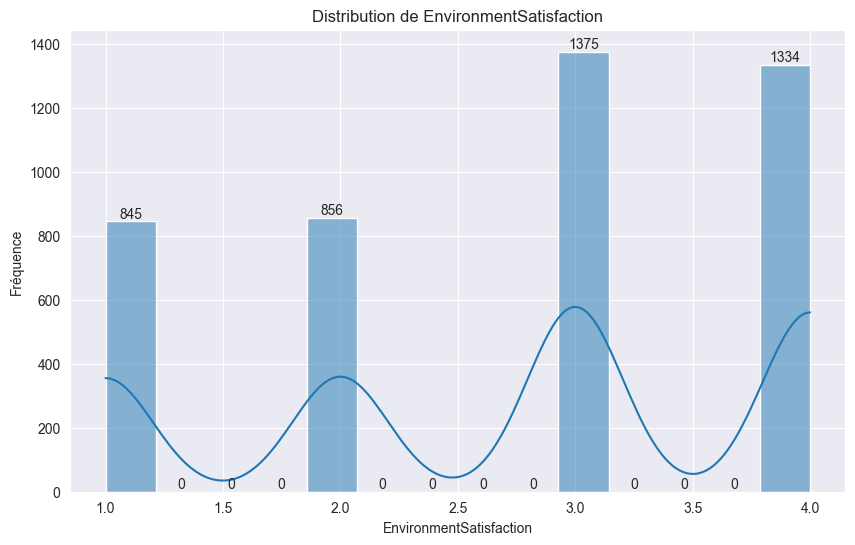

--------------------------------


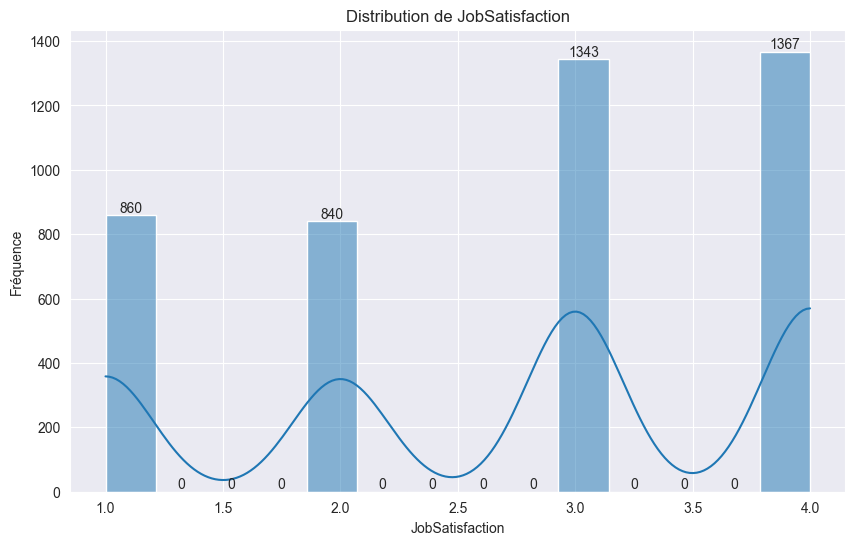

--------------------------------


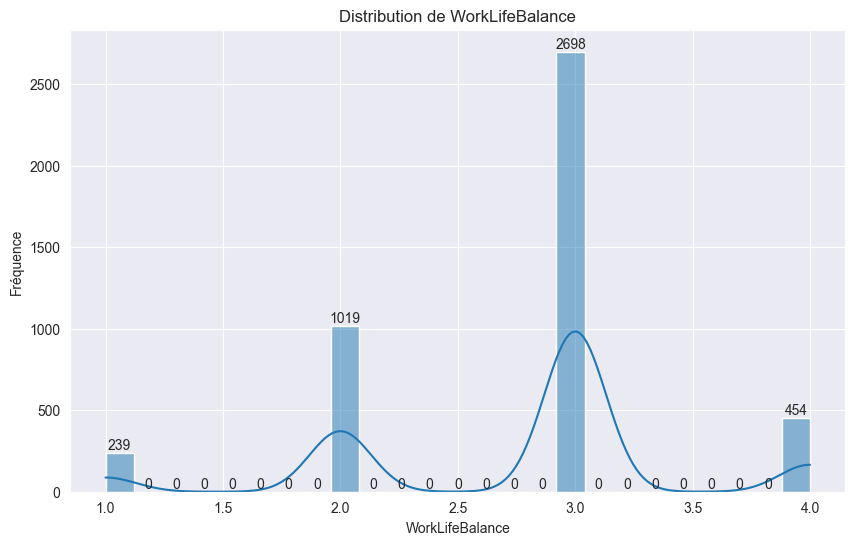

--------------------------------


In [10]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(in_time_data[column], kde=True)
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')

    # Ajouter les valeurs sur le graphe
    for i in ax.containers:
        ax.bar_label(i)

    plt.show()
    print(DELIMITER)

**Observations**
- Distribution relativement uniforme pour `EnvironmentSatisfaction`et `JobSatisfaction`
- Distribution plus concentrée pour le métrique `WorkLifeBalance`
- Pics observés sur le niveau 3 pour les trois métriques
- Niveau 1 est le moins fréquent
- Les métriques montrent des tendances positives (médianes à 3 sur 4)
- Les valeurs en dehors des niveaux correspondent aux outliers qui ont été remplacés par la valeur moyenne

=======================================================================================================


#### <a id='3_bivariee'>3.7. Analyse bivariée</a>

3.7.1. Boxplots

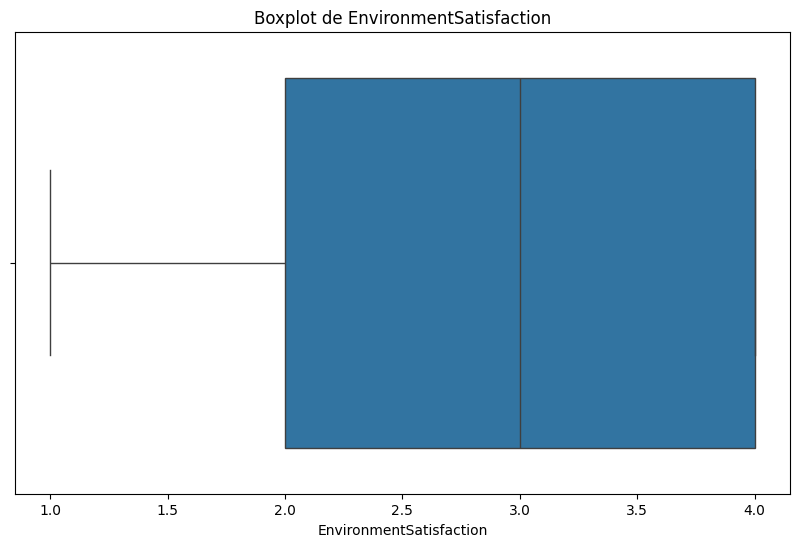

--------------------------------


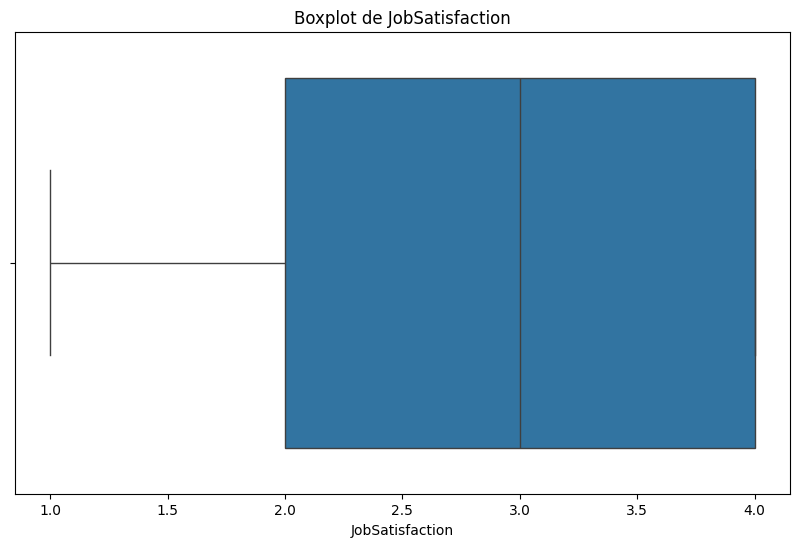

--------------------------------


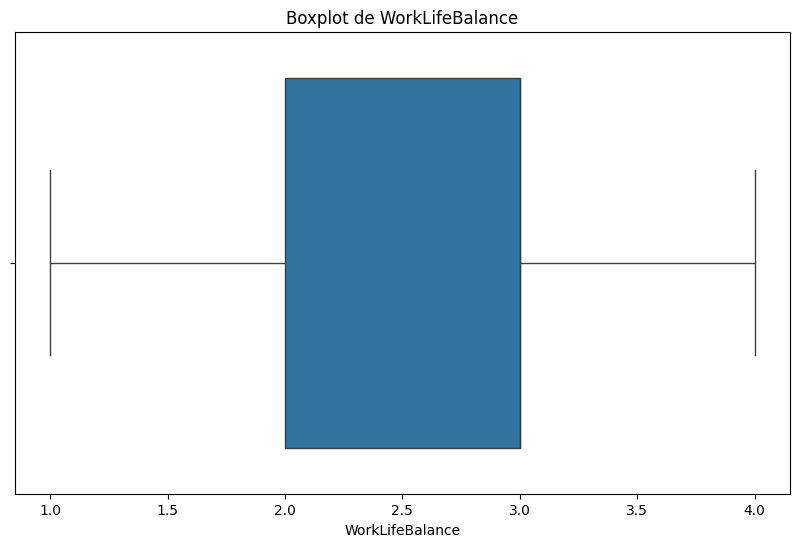

--------------------------------


In [10]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, data=in_time_data)
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.show()
    print(DELIMITER)

**Observations**
- Les trois métriques montrent des tendances positives (médianes à 3 sur 4)
- `WorkLifeBalance` montre moins de variation que les autres métriques
- Absence d'outliers (valeurs aberrantes), ce qui suggère des données cohérentes
- Les distributions sont relativements symétriques

=======================================================================================================

3.7.2. Heatmaps

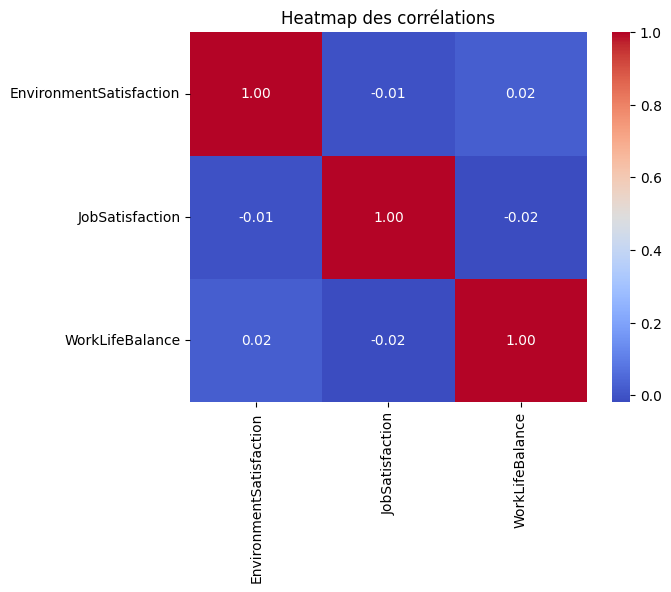

In [11]:
# Calcul de la matrice de corrélation
corr_matrix = in_time_data[['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']].corr()

# Création de la heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap des corrélations')
plt.show()

**Observations**
- `EnvironmentSatisfaction` vs `JobSatisfaction` -> Corrélation de -0.01 -> Pratiquement aucune relation
- `EnvironmentSatisfaction` vs `WorkLifeBalance` -> Corrélation de 0.02 -> Pas de relation significative
- `JobSatisfaction` vs `WorkLifeBalance` -> Corrélation de -0.01 -> Pas de relation non plus
- Aucune forte dépendance est observée entre ces métriques

=======================================================================================================

3.7.3. Scatterplots

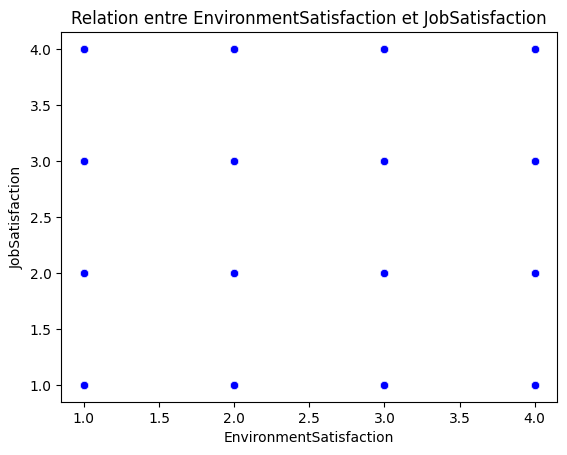

In [12]:
# Scatterplot EnvironmentSatisfaction - JobSatisfaction
sns.scatterplot(data=in_time_data, x='EnvironmentSatisfaction', y='JobSatisfaction', color='blue')
plt.title('Relation entre EnvironmentSatisfaction et JobSatisfaction')
plt.show()

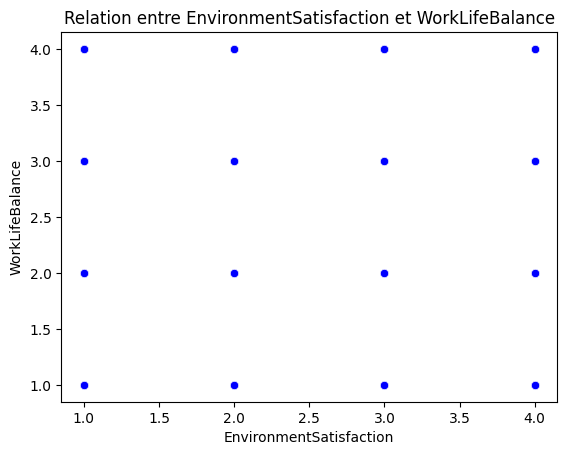

In [13]:
# Scatterplot EnvironmentSatisfaction - WorkLifeBalance
sns.scatterplot(data=in_time_data, x='EnvironmentSatisfaction', y='WorkLifeBalance', color='blue')
plt.title('Relation entre EnvironmentSatisfaction et WorkLifeBalance')
plt.show()

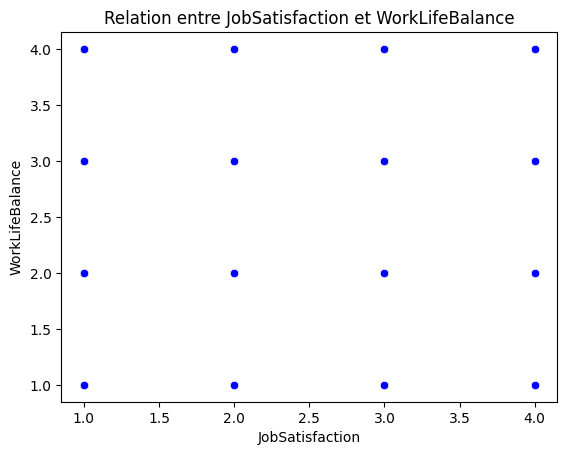

In [14]:
# Scatterplot JobSatisfaction - WorkLifeBalance
sns.scatterplot(data=in_time_data, x='JobSatisfaction', y='WorkLifeBalance', color='blue')
plt.title('Relation entre JobSatisfaction et WorkLifeBalance')
plt.show()

**Observations**
- D'après les graphiques ci-dessus, il semblerait qu'il y ait aucune relation entre les variables, donc qu'elles évoluent indépendamment.
- Une variation dans une variable n'entraînerait aucun changement chez une autre

=======================================================================================================

3.7.3. Diagrammes de densité bivarié (kdeplots)

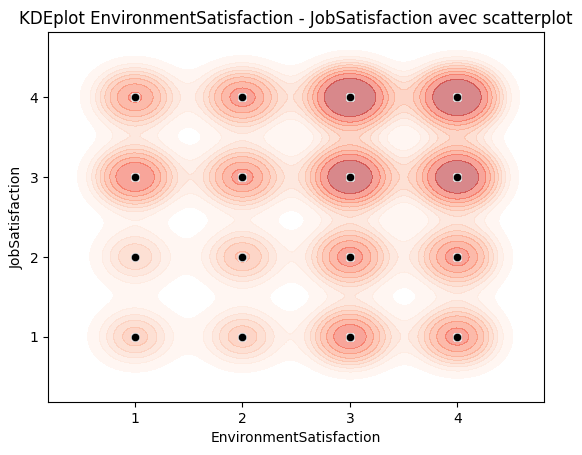

In [15]:
# Kdeplot EnvironmentSatisfaction - JobSatisfaction
sns.kdeplot(x=in_time_data['EnvironmentSatisfaction'], y=in_time_data['JobSatisfaction'], fill=True, cmap="Reds",
            alpha=0.5)

# Superposition avec un scatterplot pour plus de clarté
sns.scatterplot(x=in_time_data['EnvironmentSatisfaction'], y=in_time_data['JobSatisfaction'], color="black", alpha=0.7)

plt.title("KDEplot EnvironmentSatisfaction - JobSatisfaction avec scatterplot")
plt.show()


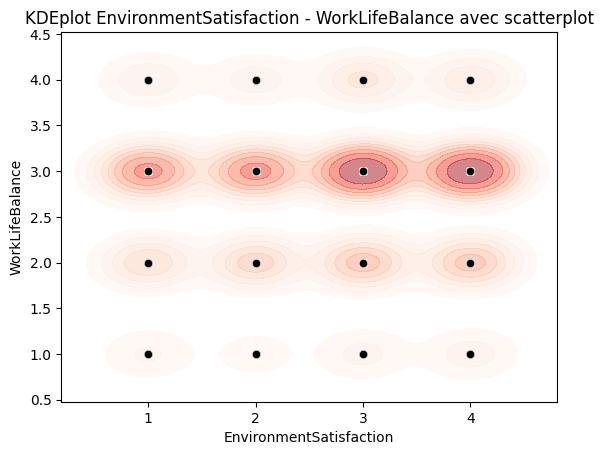

In [16]:
# KDEplot EnvironmentSatisfaction - WorkLifeBalance
sns.kdeplot(x=in_time_data['EnvironmentSatisfaction'], y=in_time_data['WorkLifeBalance'], fill=True, cmap="Reds",
            alpha=0.5)

sns.scatterplot(x=in_time_data['EnvironmentSatisfaction'], y=in_time_data['WorkLifeBalance'], color="black", alpha=0.7)

plt.title("KDEplot EnvironmentSatisfaction - WorkLifeBalance avec scatterplot")
plt.show()

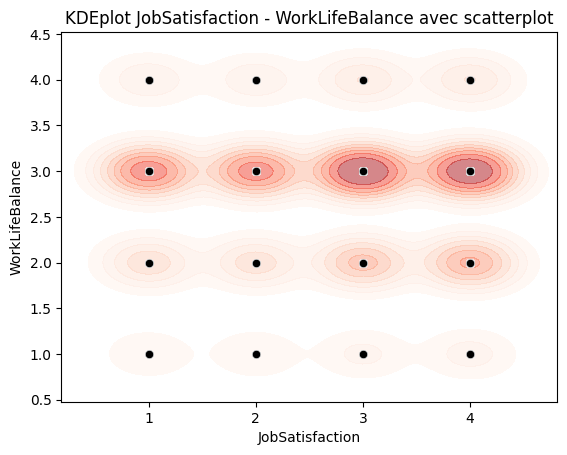

In [17]:
# KDEplot JobSatisfaction - WorkLifeBalance
sns.kdeplot(x=in_time_data['JobSatisfaction'], y=in_time_data['WorkLifeBalance'], fill=True, cmap="Reds", alpha=0.5)

sns.scatterplot(x=in_time_data['JobSatisfaction'], y=in_time_data['WorkLifeBalance'], color="black", alpha=0.7)

plt.title("KDEplot JobSatisfaction - WorkLifeBalance avec scatterplot")
plt.show()

**Observations**
- `EnvironmentSatisfaction` - `JobSatisfaction`
    - Les zones les plus denses se trouvent où `EnvironmentSatisfaction` = 3 ou 4 et `JobSatisfaction` = 3 ou 4, ce qui suggère qu'une majorité des employés sont satisfaits ou très satisfaits dans ces deux métriques
    - Les zones les moins denses se trouvent aux combinaisons faibles de satisfaction
    - Peut suggérer une corrélation potentielle entre les deux variables, mais cela a été refuté dans les étapes précédentes

- `EnvironmentSatisfaction` - `WorkLifeBalance`
    - La densité la plus élevée se trouve lorsque `EnvironmentSatisfaction` = 3 ou 4 et `WorkLifeBalance` = 3, ce qui indique que la majorité des employés ayant une satisfaction environnementale élevée perçevoit leur équilibre vie privée et vie professionnelle comme "Très satisfaisant"
    - Les combinaisons faibles de satisfaction sont très peu fréquentes, à en juger par la densité minimale sur le graphique à ces points
- `JobSatisfaction` - `WorkLifeBalance`
    - Les densités les plus élevées se trouvent autour de `JobSatisfaction` = 3 ou 4 et `WorkLifeBalance` = 3, ce qui montre que la majorité des employés ayant une satisfaction professionnelle élevée perçoivent également leur équilibre travail-vie personnelle comme "Très satisfaisant".
    - Les zones avec `JobSatisfaction` = 1 ou 2 et `WorkLifeBalance` = 1 ou 2 montrent une faible densité, ce qui indique que peu d'employés combinent une faible satisfaction professionnelle avec un mauvais équilibre travail-vie personnelle.

--------